<a href="https://colab.research.google.com/github/misshp11/CV2/blob/main/lab2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import utils
 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

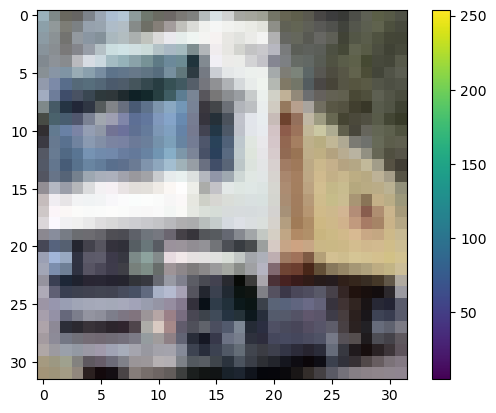

In [4]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [5]:
x_train = x_train/ 255
x_test = x_test/ 255

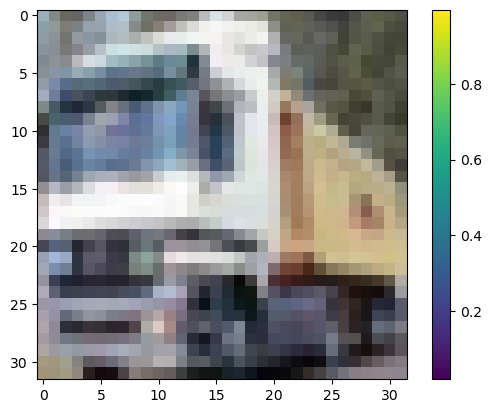

In [6]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [10]:
model.fit(x_train, y_train, epochs =30)

Epoch 1/30
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5856 - accuracy: 0.4252
Epoch 2/30
1563/1563 [==============================] - 70s 44ms/step - loss: 1.1342 - accuracy: 0.5991
Epoch 3/30
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9343 - accuracy: 0.6708
Epoch 4/30
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8025 - accuracy: 0.7192
Epoch 5/30
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7022 - accuracy: 0.7547
Epoch 6/30
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6191 - accuracy: 0.7837
Epoch 7/30
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5492 - accuracy: 0.8077
Epoch 8/30
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4806 - accuracy: 0.8324
Epoch 9/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4185 - accuracy: 0.8539
Epoch 10/30
1563/1563 [==============================] - 70s 45m

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 21ms/step - loss: 2.2512 - accuracy: 0.7496
Test loss: 2.251237392425537
Test accuracy: 0.7495999932289124


In [12]:
predictions = model.predict(x_test)

313/313 [==============================] - 7s 20ms/step


array([8], dtype=uint8)

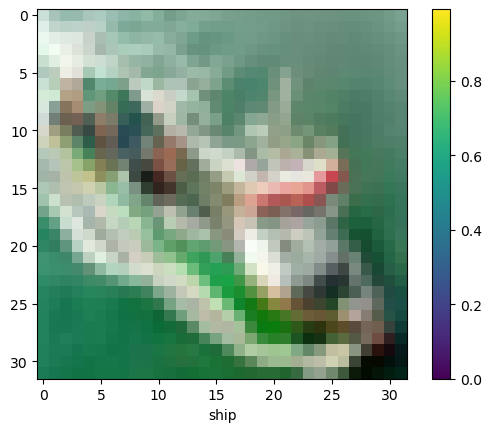

In [13]:
im = 15
predictions[im]
np.argmax(predictions[im])
y_test[im]
plt.figure()
plt.imshow(x_test[im])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_test[im][0]])
y_test[im]